In [9]:
from models.DAX import DAX_quantile_regression, DAX_baseline
from models.energy import energy_quantile_regression
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_dax

In [10]:
daxdata= get_DAX.get()

In [11]:
baseline_df = DAX_baseline.DAX_baseline(daxdata)

In [12]:
baseline_df

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975
0,2024-01-07,DAX,1 day,-3.321265,-0.538266,0.068631,0.713749,2.719772
1,2024-01-07,DAX,2 day,-4.087895,-0.785750,0.089476,0.987322,3.570492
2,2024-01-07,DAX,5 day,-5.259161,-0.885122,0.166567,1.255618,4.628697
3,2024-01-07,DAX,6 day,-6.282629,-1.007463,0.216215,1.458878,5.367396
4,2024-01-07,DAX,7 day,-6.735742,-1.049289,0.344808,1.622943,6.259934


In [13]:
quantile_df = DAX_quantile_regression.DAX_quantile_regression(daxdata)

In [14]:
quantile_df

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975
0,2024-01-07,DAX,1 day,-2.471362,-0.563225,0.084036,0.677212,1.884643
1,2024-01-07,DAX,2 day,-1.833332,0.131466,0.931368,1.527124,3.174639
2,2024-01-07,DAX,5 day,-4.733214,-2.703957,-1.825351,-1.122640,0.159017
3,2024-01-07,DAX,6 day,-4.626828,-2.630668,-1.679682,-0.982544,0.447686
4,2024-01-07,DAX,7 day,-3.610485,-2.117004,-1.196760,-0.534907,1.030251


In [15]:
baseline_model = {
    'name': 'Baseline Model',
    'function': DAX_baseline.DAX_baseline
}
quantile_model = {
    'name': 'Quantile Regression',
    'function': DAX_quantile_regression.DAX_quantile_regression
}


Merged DataFrame in evaluate_and_append:
   forecast_date target horizon    q0.025     q0.25      q0.5     q0.75  \
0    2022-01-01    DAX   1 day -2.710994 -0.489181  0.075470  0.667303   
1    2022-01-01    DAX   2 day -3.936562 -0.748017  0.163666  0.918172   
2    2022-01-01    DAX   5 day -4.759447 -0.849379  0.168228  1.222755   
3    2022-01-01    DAX   6 day -5.246158 -0.964597  0.242305  1.414134   
4    2022-01-01    DAX   7 day -5.753083 -1.093500  0.388792  1.493921   

     q0.975      actual_forecast_date          Open  ...      ret1      ret2  \
0  2.438222 2022-01-02 00:00:00+01:00           NaN  ...       NaN       NaN   
1  3.132972 2022-01-03 00:00:00+01:00  15947.440430  ...  0.851706  1.057209   
2  3.890326 2022-01-06 00:00:00+01:00  16076.160156  ... -1.359514 -0.624633   
3  4.574074 2022-01-07 00:00:00+01:00  15999.019531  ... -0.651820 -2.011333   
4  5.192237 2022-01-08 00:00:00+01:00           NaN  ...       NaN       NaN   

       ret3      ret4      ret5 

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Merged DataFrame in evaluate_and_append:
   forecast_date target horizon    q0.025     q0.25      q0.5     q0.75  \
0    2022-01-04    DAX   1 day -2.325393 -0.457551  0.048809  0.557511   
1    2022-01-04    DAX   2 day -2.176382 -0.303700  0.383759  0.894055   
2    2022-01-04    DAX   5 day -3.846113 -1.864417 -1.101435 -0.595084   
3    2022-01-04    DAX   6 day -2.195114 -0.312480  0.451798  0.995467   
4    2022-01-04    DAX   7 day -1.250297  0.670459  1.405192  1.872655   

     q0.975      actual_forecast_date          Open  ...      ret1      ret2  \
0  1.714664 2022-01-05 00:00:00+01:00  16177.440430  ...  0.734881  1.554694   
1  2.243734 2022-01-06 00:00:00+01:00  16076.160156  ... -1.359514 -0.624633   
2  0.636489 2022-01-09 00:00:00+01:00           NaN  ...       NaN       NaN   
3  2.454717 2022-01-10 00:00:00+01:00  16006.440430  ... -1.131748 -1.783568   
4  3.356015 2022-01-11 00:00:00+01:00  15918.820312  ...  1.094553 -0.037195   

       ret3      ret4      ret5 

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Merged DataFrame in evaluate_and_append:
   forecast_date target horizon    q0.025     q0.25      q0.5     q0.75  \
0    2022-01-05    DAX   1 day -2.063020 -0.458364  0.019604  0.479977   
1    2022-01-05    DAX   2 day -0.488356  1.161727  1.725334  2.159389   
2    2022-01-05    DAX   5 day -0.256271  1.393696  2.035398  2.473941   
3    2022-01-05    DAX   6 day -1.782706 -0.059539  0.537123  0.900374   
4    2022-01-05    DAX   7 day -0.154471  1.457037  2.104639  2.379470   

     q0.975      actual_forecast_date          Open  ...      ret1      ret2  \
0  1.646280 2022-01-06 00:00:00+01:00  16076.160156  ... -1.359514 -0.624633   
1  3.571274 2022-01-07 00:00:00+01:00  15999.019531  ... -0.651820 -2.011333   
2  3.725692 2022-01-10 00:00:00+01:00  16006.440430  ... -1.131748 -1.783568   
3  2.373984 2022-01-11 00:00:00+01:00  15918.820312  ...  1.094553 -0.037195   
4  3.844757 2022-01-12 00:00:00+01:00  16054.929688  ...  0.428834  1.523387   

       ret3      ret4      ret5 

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Merged DataFrame in evaluate_and_append:
   forecast_date target horizon    q0.025     q0.25      q0.5     q0.75  \
0    2022-01-13    DAX   1 day -2.992981 -0.740057  0.106370  0.875263   
1    2022-01-13    DAX   2 day -0.994791  1.237209  2.206628  3.065183   
2    2022-01-13    DAX   5 day -3.233766 -1.231397 -0.148082  0.805810   
3    2022-01-13    DAX   6 day -4.574897 -2.648457 -1.578867 -0.658340   
4    2022-01-13    DAX   7 day -7.372785 -5.525261 -4.530125 -3.674967   

     q0.975      actual_forecast_date          Open  ...      ret1      ret2  \
0  2.308517 2022-01-14 00:00:00+01:00  15929.370117  ... -0.929666 -0.796905   
1  4.873774 2022-01-15 00:00:00+01:00           NaN  ...       NaN       NaN   
2  2.385196 2022-01-18 00:00:00+01:00  15839.150391  ... -1.016591 -0.699279   
3  1.035811 2022-01-19 00:00:00+01:00  15639.450195  ...  0.235323 -0.781268   
4 -1.936208 2022-01-20 00:00:00+01:00  15837.240234  ...  0.646936  0.882259   

       ret3      ret4      ret5 

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Merged DataFrame in evaluate_and_append:
   forecast_date target horizon    q0.025     q0.25      q0.5     q0.75  \
0    2022-01-15    DAX   1 day -2.688666 -0.521019  0.045733  0.522215   
1    2022-01-15    DAX   2 day -2.661568 -0.449550  0.206380  0.769727   
2    2022-01-15    DAX   5 day -1.666815  0.314787  1.036572  1.481570   
3    2022-01-15    DAX   6 day  0.338723  2.383013  3.176379  3.729527   
4    2022-01-15    DAX   7 day -2.185402  0.060379  0.787499  1.310481   

     q0.975      actual_forecast_date          Open  ...      ret1      ret2  \
0  1.820740 2022-01-16 00:00:00+01:00           NaN  ...       NaN       NaN   
1  2.184649 2022-01-17 00:00:00+01:00  15948.900391  ...  0.317312 -0.612354   
2  3.010782 2022-01-20 00:00:00+01:00  15837.240234  ...  0.646936  0.882259   
3  5.259033 2022-01-21 00:00:00+01:00  15694.820312  ... -1.957469 -1.310533   
4  2.741076 2022-01-22 00:00:00+01:00           NaN  ...       NaN       NaN   

       ret3      ret4      ret5 

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Merged DataFrame in evaluate_and_append:
   forecast_date target horizon    q0.025     q0.25      q0.5     q0.75  \
0    2022-01-16    DAX   1 day -2.688666 -0.521019  0.045733  0.522215   
1    2022-01-16    DAX   2 day -2.661568 -0.449550  0.206380  0.769727   
2    2022-01-16    DAX   5 day -1.666815  0.314787  1.036572  1.481570   
3    2022-01-16    DAX   6 day  0.338723  2.383013  3.176379  3.729527   
4    2022-01-16    DAX   7 day -2.185402  0.060379  0.787499  1.310481   

     q0.975      actual_forecast_date          Open  ...      ret1      ret2  \
0  1.820740 2022-01-17 00:00:00+01:00  15948.900391  ...  0.317312 -0.612354   
1  2.184649 2022-01-18 00:00:00+01:00  15839.150391  ... -1.016591 -0.699279   
2  3.010782 2022-01-21 00:00:00+01:00  15694.820312  ... -1.957469 -1.310533   
3  5.259033 2022-01-22 00:00:00+01:00           NaN  ...       NaN       NaN   
4  2.741076 2022-01-23 00:00:00+01:00           NaN  ...       NaN       NaN   

       ret3      ret4      ret5 

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Merged DataFrame in evaluate_and_append:
   forecast_date target horizon    q0.025     q0.25      q0.5     q0.75  \
0    2022-01-17    DAX   1 day -2.688666 -0.521019  0.045733  0.522215   
1    2022-01-17    DAX   2 day -2.661568 -0.449550  0.206380  0.769727   
2    2022-01-17    DAX   5 day -1.666815  0.314787  1.036572  1.481570   
3    2022-01-17    DAX   6 day  0.338723  2.383013  3.176379  3.729527   
4    2022-01-17    DAX   7 day -2.185402  0.060379  0.787499  1.310481   

     q0.975      actual_forecast_date          Open  ...      ret1      ret2  \
0  1.820740 2022-01-18 00:00:00+01:00  15839.150391  ... -1.016591 -0.699279   
1  2.184649 2022-01-19 00:00:00+01:00  15639.450195  ...  0.235323 -0.781268   
2  3.010782 2022-01-22 00:00:00+01:00           NaN  ...       NaN       NaN   
3  5.259033 2022-01-23 00:00:00+01:00           NaN  ...       NaN       NaN   
4  2.741076 2022-01-24 00:00:00+01:00  15499.610352  ... -3.872768 -5.830237   

       ret3      ret4      ret5 

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Merged DataFrame in evaluate_and_append:
   forecast_date target horizon    q0.025     q0.25      q0.5     q0.75  \
0    2022-01-18    DAX   1 day -2.551175 -0.482410  0.100200  0.552307   
1    2022-01-18    DAX   2 day -4.720402 -2.596176 -1.909658 -1.384061   
2    2022-01-18    DAX   5 day -4.719773 -2.517841 -1.744812 -1.214949   
3    2022-01-18    DAX   6 day -3.886661 -1.725164 -0.982283 -0.438782   
4    2022-01-18    DAX   7 day -1.779334  0.407773  1.219021  1.768222   

     q0.975      actual_forecast_date          Open  ...      ret1      ret2  \
0  1.759885 2022-01-19 00:00:00+01:00  15639.450195  ...  0.235323 -0.781268   
1 -0.055662 2022-01-20 00:00:00+01:00  15837.240234  ...  0.646936  0.882259   
2  0.163884 2022-01-23 00:00:00+01:00           NaN  ...       NaN       NaN   
3  1.368858 2022-01-24 00:00:00+01:00  15499.610352  ... -3.872768 -5.830237   
4  3.475934 2022-01-25 00:00:00+01:00  15139.070312  ...  0.748238 -3.124530   

       ret3      ret4      ret5 

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Merged DataFrame in evaluate_and_append:
   forecast_date target horizon    q0.025     q0.25      q0.5     q0.75  \
0    2022-01-28    DAX   1 day -2.976241 -0.864722  0.104752  0.895657   
1    2022-01-28    DAX   2 day  1.212342  3.384493  4.319519  5.254808   
2    2022-01-28    DAX   5 day  2.840482  4.529523  5.606944  6.594263   
3    2022-01-28    DAX   6 day -4.868012 -2.970974 -2.008744 -1.134655   
4    2022-01-28    DAX   7 day -8.697750 -7.162482 -6.116094 -5.354220   

     q0.975      actual_forecast_date          Open  ...      ret1      ret2  \
0  2.612128 2022-01-29 00:00:00+01:00           NaN  ...       NaN       NaN   
1  7.438241 2022-01-30 00:00:00+01:00           NaN  ...       NaN       NaN   
2  8.623030 2022-02-02 00:00:00+01:00  15689.160156  ... -0.035988  0.917294   
3  0.827978 2022-02-03 00:00:00+01:00  15565.940430  ... -1.583520 -1.619508   
4 -3.322910 2022-02-04 00:00:00+01:00  15410.730469  ... -1.765241 -3.348761   

       ret3      ret4      ret5 

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldc

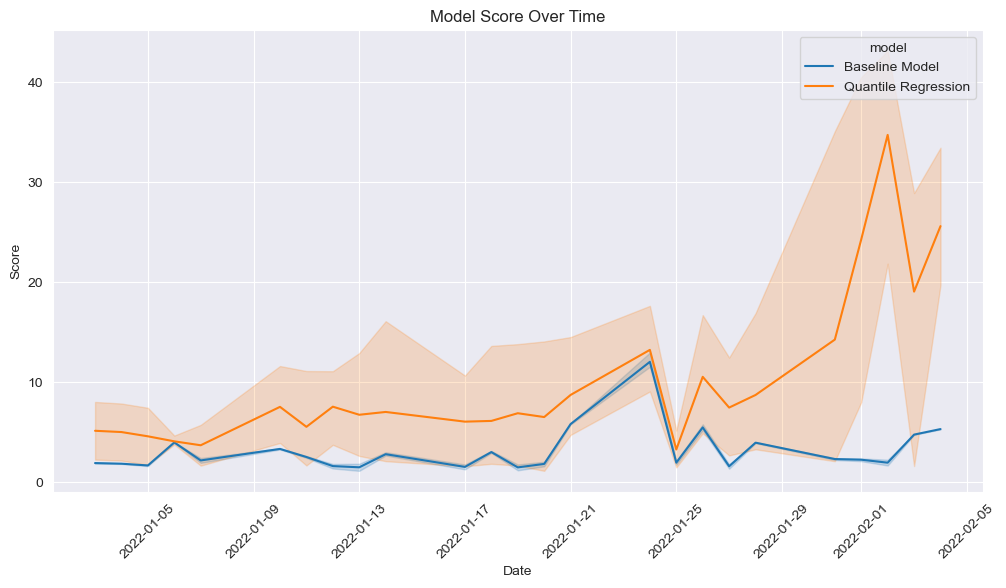

In [39]:
start_date = '2022-01-01'
end_date = '2022-01-30'

evaluation_model1, evaluation_model2 = evaluate_dax.evaluate(baseline_model, quantile_model, daxdata, start_date, end_date)

In [40]:
evaluation_model1['score'].sum()

341.67314834257564

In [41]:
evaluation_model2['score'].sum()

1023.5751664993986

In [42]:
evaluation_model1['score'].mean()

3.223331588137506

In [43]:
evaluation_model2['score'].mean()

9.656369495277346

In [44]:
evaluation_model1['score'].std()

2.3929835724842072

In [45]:
evaluation_model2['score'].std()

10.692788299835167

In [46]:
from functions import naive_ensemble

In [47]:
evaluation_model1

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,Open,...,ret3,ret4,ret5,lag_ret1,lag_ret2,lag_ret3,lag_ret4,lag_ret5,score,model
0,2022-01-01,DAX,1 day,-2.710994,-0.489181,0.075470,0.667303,2.438222,2022-01-02 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline Model
1,2022-01-01,DAX,2 day,-3.936562,-0.748017,0.163666,0.918172,3.132972,2022-01-03 00:00:00+01:00,15947.440430,...,0.356613,1.164507,1.664265,15884.860352,15852.250000,15963.700195,15835.250000,15756.309570,1.874611,Baseline Model
2,2022-01-01,DAX,5 day,-4.759447,-0.849379,0.168228,1.222755,3.890326,2022-01-06 00:00:00+01:00,16076.160156,...,0.195180,1.046886,1.252389,16271.750000,16152.610352,16020.730469,15884.860352,15852.250000,4.016567,Baseline Model
3,2022-01-01,DAX,6 day,-5.246158,-0.964597,0.242305,1.414134,4.574074,2022-01-07 00:00:00+01:00,15999.019531,...,-1.276453,-0.456640,0.395066,16052.030273,16271.750000,16152.610352,16020.730469,15884.860352,2.574501,Baseline Model
4,2022-01-01,DAX,7 day,-5.753083,-1.093500,0.388792,1.493921,5.192237,2022-01-08 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline Model
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2022-01-30,DAX,1 day,-2.778102,-0.483787,0.082567,0.672572,2.438222,2022-01-31 00:00:00+01:00,15506.790039,...,0.076368,2.270595,3.018833,15318.950195,15524.269531,15459.389648,15123.870117,15011.129883,2.378167,Baseline Model
1,2022-01-30,DAX,2 day,-3.993250,-0.739256,0.165072,0.928725,3.132972,2022-02-01 00:00:00+01:00,15620.559570,...,0.610849,1.029651,3.223877,15471.200195,15318.950195,15524.269531,15459.389648,15123.870117,2.027626,Baseline Model
2,2022-01-30,DAX,5 day,-4.874385,-0.830364,0.189690,1.233589,3.890326,2022-02-04 00:00:00+01:00,15410.730469,...,-3.384749,-2.431467,-1.442506,15368.469727,15613.769531,15619.389648,15471.200195,15318.950195,5.294898,Baseline Model
3,2022-01-30,DAX,6 day,-5.232030,-0.943220,0.258011,1.410106,4.574074,2022-02-05 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline Model


In [48]:
evaluation_model2

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,Open,...,ret3,ret4,ret5,lag_ret1,lag_ret2,lag_ret3,lag_ret4,lag_ret5,score,model
0,2022-01-01,DAX,1 day,-2.343407,-0.411294,0.058369,0.418890,1.623743,2022-01-02 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quantile Regression
1,2022-01-01,DAX,2 day,-3.967863,-1.999875,-1.454385,-1.044189,0.227270,2022-01-03 00:00:00+01:00,15947.440430,...,0.356613,1.164507,1.664265,15884.860352,15852.250000,15963.700195,15835.250000,15756.309570,8.034352,Quantile Regression
2,2022-01-01,DAX,5 day,-2.589894,-0.529722,0.070290,0.423697,1.766595,2022-01-06 00:00:00+01:00,16076.160156,...,0.195180,1.046886,1.252389,16271.750000,16152.610352,16020.730469,15884.860352,15852.250000,3.783920,Quantile Regression
3,2022-01-01,DAX,6 day,-1.654888,0.388461,0.997539,1.362850,3.041523,2022-01-07 00:00:00+01:00,15999.019531,...,-1.276453,-0.456640,0.395066,16052.030273,16271.750000,16152.610352,16020.730469,15884.860352,4.451936,Quantile Regression
4,2022-01-01,DAX,7 day,0.233902,2.378617,3.066923,3.424119,4.960660,2022-01-08 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quantile Regression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2022-01-30,DAX,1 day,-3.353595,-0.700938,0.019857,0.545712,2.217568,2022-01-31 00:00:00+01:00,15506.790039,...,0.076368,2.270595,3.018833,15318.950195,15524.269531,15459.389648,15123.870117,15011.129883,2.757483,Quantile Regression
1,2022-01-30,DAX,2 day,-2.554995,-0.000227,0.719138,1.455287,3.166593,2022-02-01 00:00:00+01:00,15620.559570,...,0.610849,1.029651,3.223877,15471.200195,15318.950195,15524.269531,15459.389648,15123.870117,1.247980,Quantile Regression
2,2022-01-30,DAX,5 day,2.213739,4.242714,4.944932,5.435801,7.546547,2022-02-04 00:00:00+01:00,15410.730469,...,-3.384749,-2.431467,-1.442506,15368.469727,15613.769531,15619.389648,15471.200195,15318.950195,27.547229,Quantile Regression
3,2022-01-30,DAX,6 day,3.110567,5.491987,6.349892,7.033846,8.738981,2022-02-05 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quantile Regression


In [49]:
ensemble_df = naive_ensemble.ensemble(evaluation_model1, evaluation_model2,0.8,0.2)

In [50]:
ensemble_df

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,Open,...,ret3,ret4,ret5,lag_ret1,lag_ret2,lag_ret3,lag_ret4,lag_ret5,score,model
0,2022-01-01,DAX,1 day,-2.637477,-0.473603,0.072050,0.617620,2.275326,2022-01-02 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline Model
1,2022-01-01,DAX,2 day,-3.942823,-0.998389,-0.159944,0.525700,2.551831,2022-01-03 00:00:00+01:00,15947.440430,...,0.356613,1.164507,1.664265,15884.860352,15852.250000,15963.700195,15835.250000,15756.309570,1.874611,Baseline Model
2,2022-01-01,DAX,5 day,-4.325536,-0.785448,0.148640,1.062943,3.465580,2022-01-06 00:00:00+01:00,16076.160156,...,0.195180,1.046886,1.252389,16271.750000,16152.610352,16020.730469,15884.860352,15852.250000,4.016567,Baseline Model
3,2022-01-01,DAX,6 day,-4.527904,-0.693985,0.393352,1.403877,4.267564,2022-01-07 00:00:00+01:00,15999.019531,...,-1.276453,-0.456640,0.395066,16052.030273,16271.750000,16152.610352,16020.730469,15884.860352,2.574501,Baseline Model
4,2022-01-01,DAX,7 day,-4.555686,-0.399076,0.924419,1.879961,5.145922,2022-01-08 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline Model
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2022-01-30,DAX,1 day,-2.893201,-0.527217,0.070025,0.647200,2.394091,2022-01-31 00:00:00+01:00,15506.790039,...,0.076368,2.270595,3.018833,15318.950195,15524.269531,15459.389648,15123.870117,15011.129883,2.378167,Baseline Model
1,2022-01-30,DAX,2 day,-3.705599,-0.591450,0.275886,1.034038,3.139696,2022-02-01 00:00:00+01:00,15620.559570,...,0.610849,1.029651,3.223877,15471.200195,15318.950195,15524.269531,15459.389648,15123.870117,2.027626,Baseline Model
2,2022-01-30,DAX,5 day,-3.456760,0.184252,1.140739,2.074031,4.621570,2022-02-04 00:00:00+01:00,15410.730469,...,-3.384749,-2.431467,-1.442506,15368.469727,15613.769531,15619.389648,15471.200195,15318.950195,5.294898,Baseline Model
3,2022-01-30,DAX,6 day,-3.563511,0.343821,1.476387,2.534854,5.407055,2022-02-05 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline Model


In [51]:
import pandas as pd
def evaluate_ensemble_model(ensemble_df, actual_values):
    """
    Evaluate the ensemble model using the provided scoring method.

    :param ensemble_df: DataFrame containing the ensemble forecasts
    :param actual_values: Series or DataFrame containing the actual observed values
    :return: DataFrame with the scores for each horizon in the ensemble forecast
    """
    scores = []
    for index, row in ensemble_df.iterrows():
        forecast_date = row['forecast_date']
        horizon = row['horizon']
        quantile_preds = [row[f'q{q}'] for q in ['0.025', '0.25', '0.5', '0.75', '0.975']]
        obs = actual_values.loc[(actual_values['forecast_date'] == forecast_date) & (actual_values['horizon'] == horizon), 'ret1'].iloc[0]
        score = evaluate_horizon(quantile_preds, obs)
        scores.append({'forecast_date': forecast_date, 'horizon': horizon, 'score': score})

    return pd.DataFrame(scores)

# Example usage
# ensemble_df is your DataFrame containing the ensemble forecasts
# actual_values is your DataFrame containing the actual observed values (e.g., 'Close' prices)
ensemble_scores = evaluate_ensemble_model(ensemble_df, evaluation_model1)
print(ensemble_scores)


    forecast_date horizon     score
0      2022-01-01   1 day       NaN
1      2022-01-01   2 day  2.750439
2      2022-01-01   5 day  3.970037
3      2022-01-01   6 day  2.533876
4      2022-01-01   7 day       NaN
..            ...     ...       ...
145    2022-01-30   1 day  2.454030
146    2022-01-30   2 day  1.832406
147    2022-01-30   5 day  8.153772
148    2022-01-30   6 day       NaN
149    2022-01-30   7 day       NaN

[150 rows x 3 columns]


In [52]:
ensemble_scores['score'].sum()

381.7518678284096

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/sea

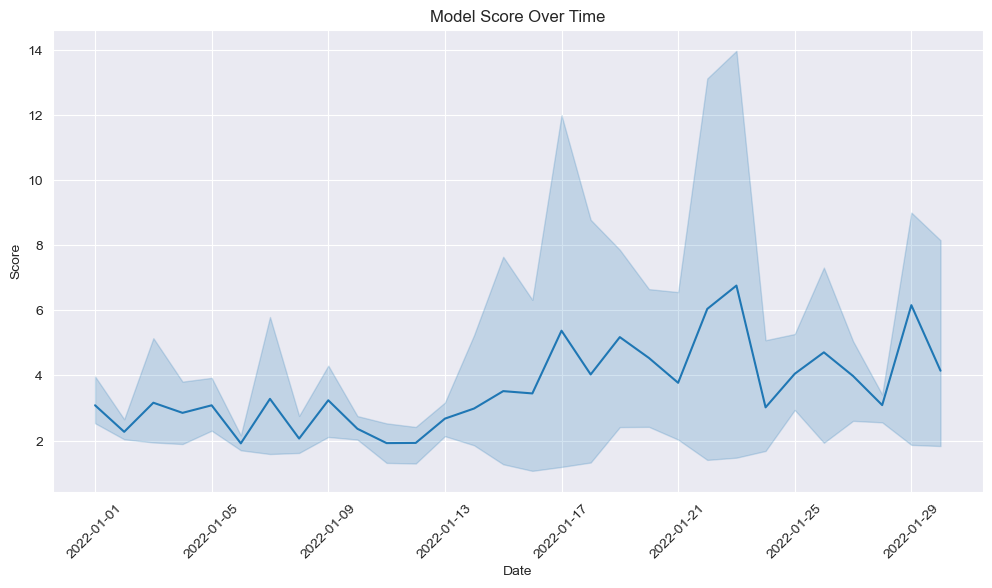

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ensemble_scores, x='forecast_date', y='score')
plt.title('Model Score Over Time')
plt.xlabel('Date')
plt.ylabel('Score')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

In [ ]:
ensemble_df=naive_ensemble.ensemble(evaluation_model1, evaluation_model2,0.5,0.5)